In [3]:
# =============================================================================
# NOTEBOOK 02: EXPLORATORY DATA ANALYSIS
# =============================================================================
# Project: Retail Predictive Analytics Suite
# Author: [Your Name]
# Date: 2024
# =============================================================================

# =============================================================================
# CELL 1: IMPORT LIBRARIES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Visual style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("Libraries imported successfully")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")

Libraries imported successfully
Analysis Date: 2026-02-11 13:10


In [4]:
# =============================================================================
# CELL 2: LOAD CLEANED DATA
# =============================================================================

# Load cleaned dataset
df = pd.read_csv('../data/processed/clean_retail.csv')

# Convert date columns
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = pd.to_datetime(df['YearMonth'])

print("=" * 60)
print("DATASET LOADED")
print("=" * 60)
print(f"\nRows: {len(df):,}")
print(f"Columns: {len(df.columns)}")
print(f"Date Range: {df['InvoiceDate'].min().date()} to {df['InvoiceDate'].max().date()}")

# Display sample
print("\nSample Data:")
display(df.head())

DATASET LOADED

Rows: 779,425
Columns: 16
Date Range: 2009-12-01 to 2011-12-09

Sample Data:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Year,Month,Day,DayOfWeek,Hour,YearMonth,DayName
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009,12,1,1,7,2009-12-01,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12,1,1,7,2009-12-01,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12,1,1,7,2009-12-01,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009,12,1,1,7,2009-12-01,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009,12,1,1,7,2009-12-01,Tuesday


In [5]:
# =============================================================================
# CELL 3: BUSINESS OVERVIEW METRICS
# =============================================================================

print("=" * 60)
print("BUSINESS OVERVIEW METRICS")
print("=" * 60)

# Calculate key metrics
total_revenue = df['Revenue'].sum()
total_transactions = df['Invoice'].nunique()
total_customers = df['Customer ID'].nunique()
total_products = df['StockCode'].nunique()
total_countries = df['Country'].nunique()
total_quantity = df['Quantity'].sum()

# Average metrics
avg_order_value = df.groupby('Invoice')['Revenue'].sum().mean()
avg_items_per_order = df.groupby('Invoice')['Quantity'].sum().mean()
avg_revenue_per_customer = df.groupby('Customer ID')['Revenue'].sum().mean()

# Print metrics
print(f"""
SALES METRICS
-----------------------------------------
Total Revenue:           {total_revenue:>15,.2f} GBP
Total Transactions:      {total_transactions:>15,}
Total Items Sold:        {total_quantity:>15,}

CUSTOMER METRICS
-----------------------------------------
Total Customers:         {total_customers:>15,}
Total Countries:         {total_countries:>15}
Avg Revenue/Customer:    {avg_revenue_per_customer:>15,.2f} GBP

ORDER METRICS
-----------------------------------------
Avg Order Value:         {avg_order_value:>15,.2f} GBP
Avg Items per Order:     {avg_items_per_order:>15,.1f}

PRODUCT METRICS
-----------------------------------------
Total Unique Products:   {total_products:>15,}
Avg Price per Item:      {df['Price'].mean():>15,.2f} GBP
""")

BUSINESS OVERVIEW METRICS

SALES METRICS
-----------------------------------------
Total Revenue:             17,374,804.27 GBP
Total Transactions:               36,969
Total Items Sold:             10,513,952

CUSTOMER METRICS
-----------------------------------------
Total Customers:                   5,878
Total Countries:                      41
Avg Revenue/Customer:           2,955.90 GBP

ORDER METRICS
-----------------------------------------
Avg Order Value:                  469.98 GBP
Avg Items per Order:               284.4

PRODUCT METRICS
-----------------------------------------
Total Unique Products:             4,631
Avg Price per Item:                 3.22 GBP



REVENUE ANALYSIS - TIME SERIES


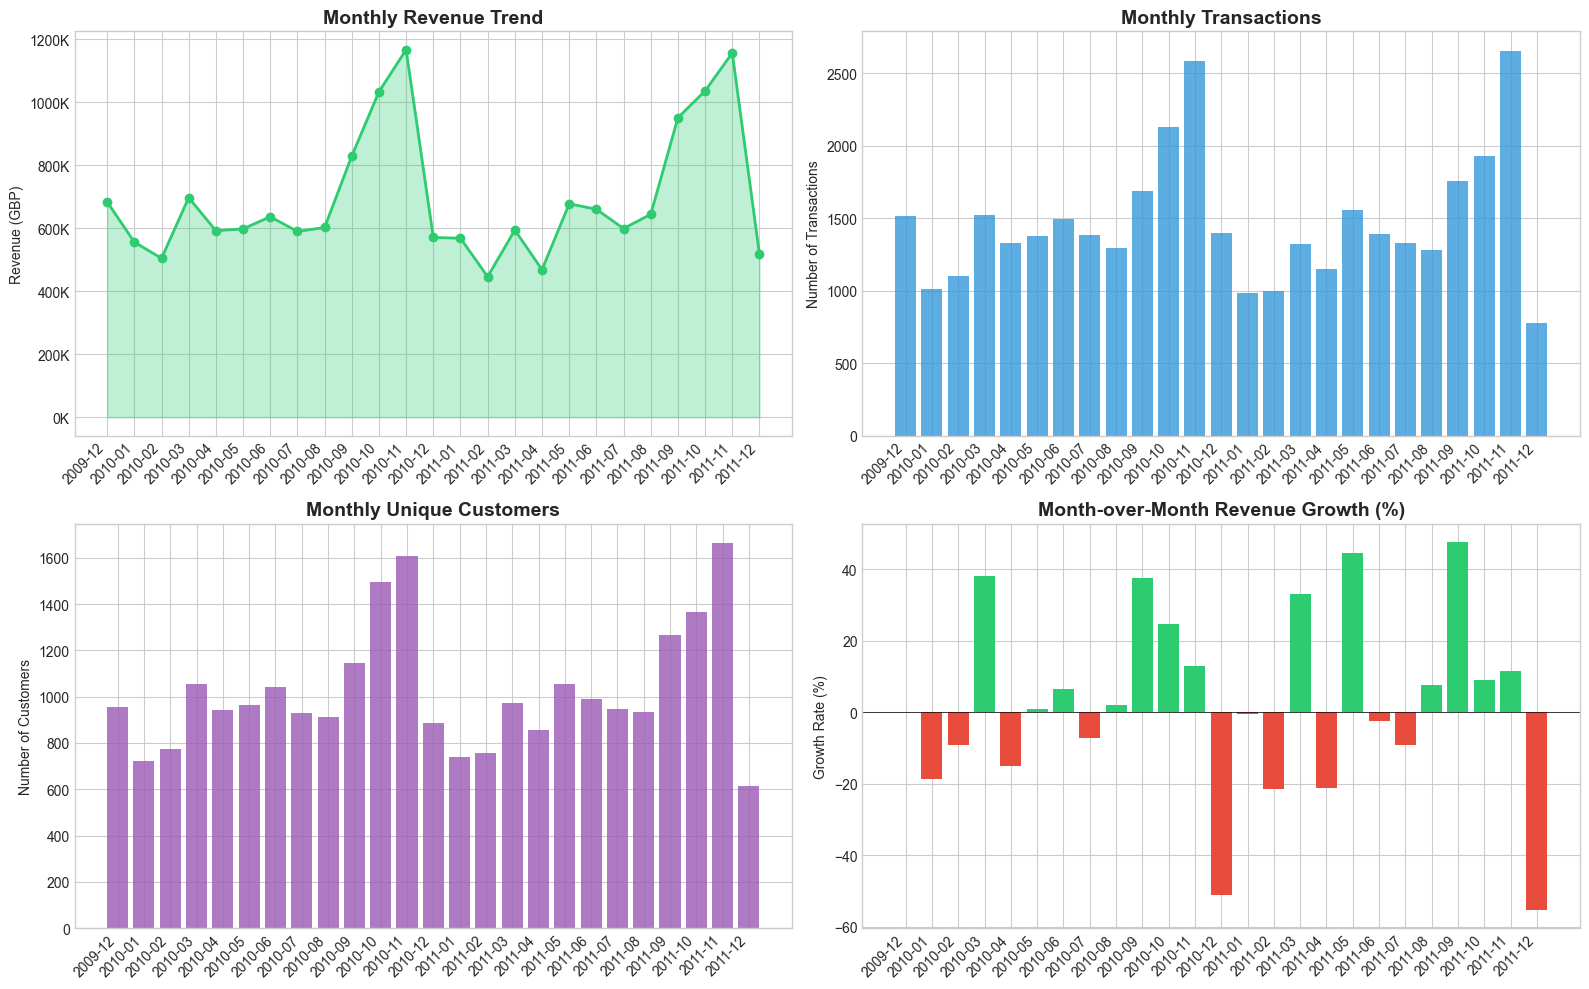


Plot saved: outputs/revenue_trends.png

Monthly Summary:


,Month,Revenue,Transactions,Customers,Quantity,Growth
0,2009-12,683504.01,1512,955,398660,NaN
1,2010-01,555802.67,1011,720,370082,-18.68
2,2010-02,504558.96,1104,772,371861,-9.22
3,2010-03,696978.47,1524,1057,502100,38.14
4,2010-04,591982.00,1329,942,350587,-15.06
5,2010-05,597833.38,1377,966,384960,0.99
6,2010-06,636371.13,1497,1041,389872,6.45
7,2010-07,589736.17,1381,928,324632,-7.33
8,2010-08,602224.60,1293,911,452542,2.12
9,2010-09,829013.95,1689,1145,567153,37.66


In [6]:
# =============================================================================
# CELL 4: REVENUE ANALYSIS - TIME SERIES
# =============================================================================

print("=" * 60)
print("REVENUE ANALYSIS - TIME SERIES")
print("=" * 60)

# Monthly revenue
monthly_revenue = df.groupby(df['InvoiceDate'].dt.to_period('M')).agg({
    'Revenue': 'sum',
    'Invoice': 'nunique',
    'Customer ID': 'nunique',
    'Quantity': 'sum'
}).reset_index()

monthly_revenue.columns = ['Month', 'Revenue', 'Transactions', 'Customers', 'Quantity']
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Monthly Revenue Trend
ax1 = axes[0, 0]
ax1.plot(range(len(monthly_revenue)), monthly_revenue['Revenue'], 
         marker='o', linewidth=2, markersize=6, color='#2ecc71')
ax1.fill_between(range(len(monthly_revenue)), monthly_revenue['Revenue'], 
                  alpha=0.3, color='#2ecc71')
ax1.set_xticks(range(len(monthly_revenue)))
ax1.set_xticklabels(monthly_revenue['Month'], rotation=45, ha='right')
ax1.set_title('Monthly Revenue Trend', fontsize=14, fontweight='bold')
ax1.set_ylabel('Revenue (GBP)')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

# Plot 2: Monthly Transactions
ax2 = axes[0, 1]
ax2.bar(range(len(monthly_revenue)), monthly_revenue['Transactions'], 
        color='#3498db', alpha=0.8)
ax2.set_xticks(range(len(monthly_revenue)))
ax2.set_xticklabels(monthly_revenue['Month'], rotation=45, ha='right')
ax2.set_title('Monthly Transactions', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Transactions')

# Plot 3: Monthly Unique Customers
ax3 = axes[1, 0]
ax3.bar(range(len(monthly_revenue)), monthly_revenue['Customers'], 
        color='#9b59b6', alpha=0.8)
ax3.set_xticks(range(len(monthly_revenue)))
ax3.set_xticklabels(monthly_revenue['Month'], rotation=45, ha='right')
ax3.set_title('Monthly Unique Customers', fontsize=14, fontweight='bold')
ax3.set_ylabel('Number of Customers')

# Plot 4: Revenue Growth Rate
ax4 = axes[1, 1]
monthly_revenue['Growth'] = monthly_revenue['Revenue'].pct_change() * 100
colors = ['#2ecc71' if x >= 0 else '#e74c3c' for x in monthly_revenue['Growth'].fillna(0)]
ax4.bar(range(len(monthly_revenue)), monthly_revenue['Growth'].fillna(0), color=colors)
ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax4.set_xticks(range(len(monthly_revenue)))
ax4.set_xticklabels(monthly_revenue['Month'], rotation=45, ha='right')
ax4.set_title('Month-over-Month Revenue Growth (%)', fontsize=14, fontweight='bold')
ax4.set_ylabel('Growth Rate (%)')

plt.tight_layout()
plt.savefig('../outputs/revenue_trends.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved: outputs/revenue_trends.png")

# Display monthly data
print("\nMonthly Summary:")
display(monthly_revenue)

DAY OF WEEK ANALYSIS


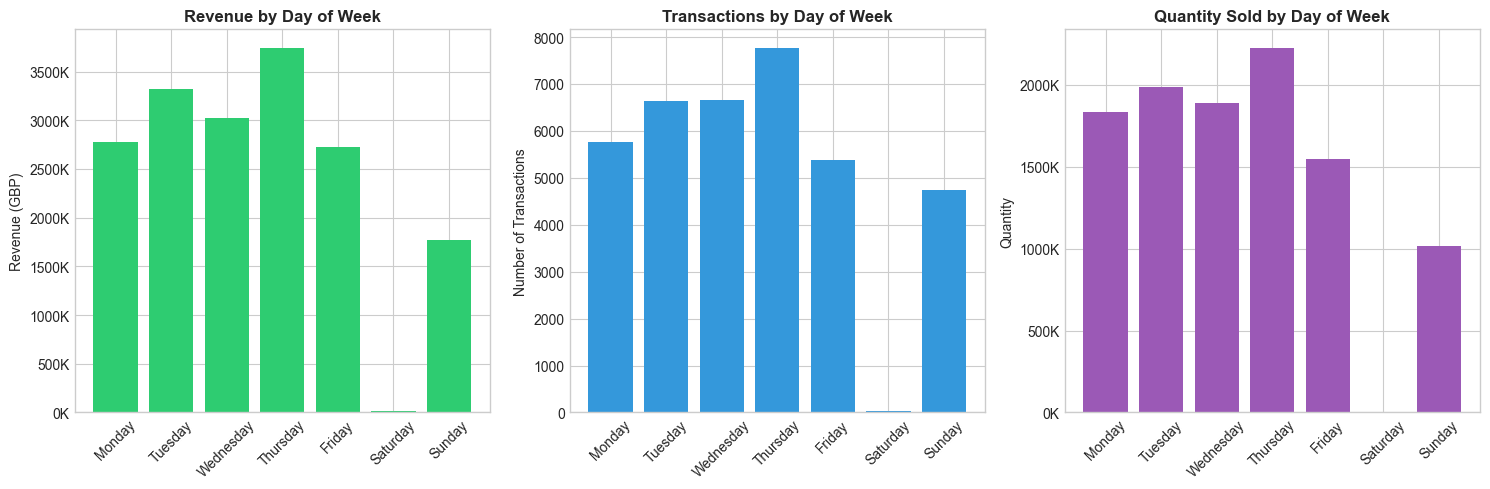


Plot saved: outputs/day_of_week_analysis.png

Day of Week Summary:


,DayName,Revenue,Invoice,Quantity
0,Monday,2778201.57,5755,1836952
1,Tuesday,3322830.14,6627,1987201
2,Wednesday,3021043.85,6649,1891899
3,Thursday,3745783.43,7773,2226914
4,Friday,2728473.17,5387,1547092
5,Saturday,9803.05,30,5119
6,Sunday,1768669.05,4748,1018775


In [7]:
# =============================================================================
# CELL 5: DAY OF WEEK ANALYSIS
# =============================================================================

print("=" * 60)
print("DAY OF WEEK ANALYSIS")
print("=" * 60)

# Aggregate by day of week
dow_analysis = df.groupby('DayOfWeek').agg({
    'Revenue': 'sum',
    'Invoice': 'nunique',
    'Quantity': 'sum'
}).reset_index()

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_analysis['DayName'] = dow_analysis['DayOfWeek'].map(dict(enumerate(day_names)))

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Revenue by day
ax1 = axes[0]
bars1 = ax1.bar(dow_analysis['DayName'], dow_analysis['Revenue'], color='#2ecc71')
ax1.set_title('Revenue by Day of Week', fontsize=12, fontweight='bold')
ax1.set_ylabel('Revenue (GBP)')
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

# Transactions by day
ax2 = axes[1]
bars2 = ax2.bar(dow_analysis['DayName'], dow_analysis['Invoice'], color='#3498db')
ax2.set_title('Transactions by Day of Week', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Transactions')
ax2.tick_params(axis='x', rotation=45)

# Quantity by day
ax3 = axes[2]
bars3 = ax3.bar(dow_analysis['DayName'], dow_analysis['Quantity'], color='#9b59b6')
ax3.set_title('Quantity Sold by Day of Week', fontsize=12, fontweight='bold')
ax3.set_ylabel('Quantity')
ax3.tick_params(axis='x', rotation=45)
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

plt.tight_layout()
plt.savefig('../outputs/day_of_week_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved: outputs/day_of_week_analysis.png")

# Display summary
print("\nDay of Week Summary:")
display(dow_analysis[['DayName', 'Revenue', 'Invoice', 'Quantity']])

HOURLY ANALYSIS


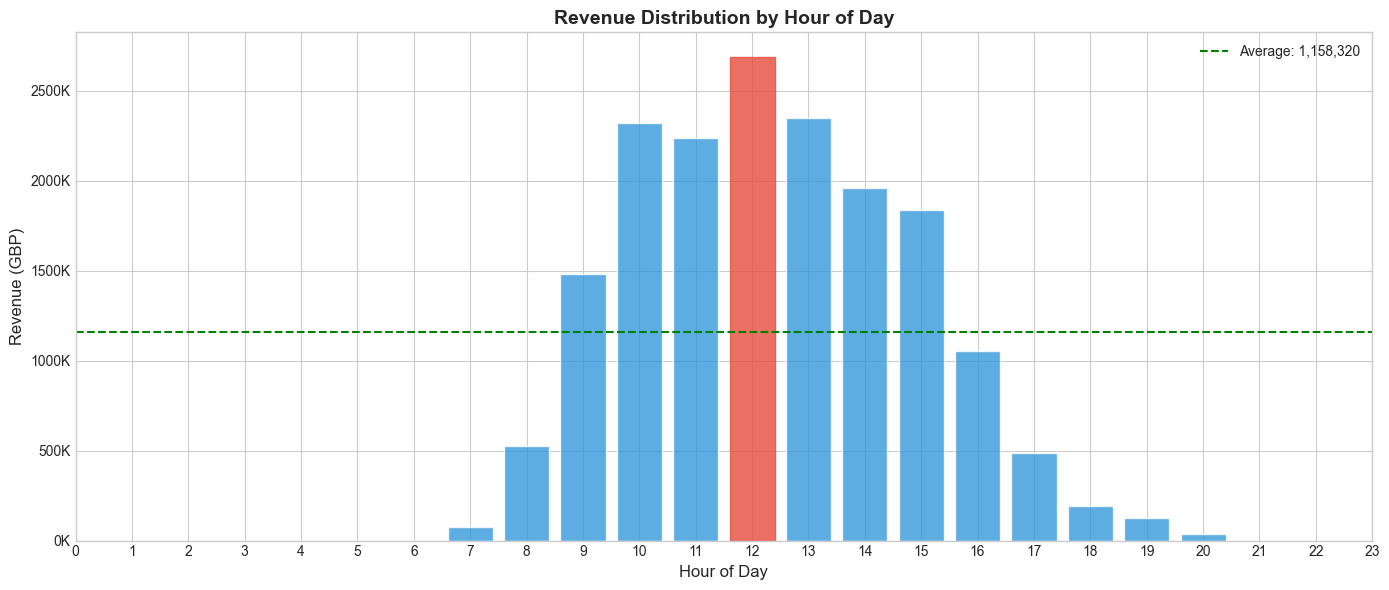


Plot saved: outputs/hourly_analysis.png

Peak Hour: 12:00 with Revenue: 2,690,583.50 GBP


In [8]:
# =============================================================================
# CELL 6: HOURLY ANALYSIS
# =============================================================================

print("=" * 60)
print("HOURLY ANALYSIS")
print("=" * 60)

# Aggregate by hour
hourly_analysis = df.groupby('Hour').agg({
    'Revenue': 'sum',
    'Invoice': 'nunique',
    'Quantity': 'sum'
}).reset_index()

# Visualization
fig, ax = plt.subplots(figsize=(14, 6))

# Create bar chart
bars = ax.bar(hourly_analysis['Hour'], hourly_analysis['Revenue'], 
              color='#3498db', alpha=0.8, edgecolor='white')

# Highlight peak hours
peak_hour = hourly_analysis.loc[hourly_analysis['Revenue'].idxmax(), 'Hour']
for i, bar in enumerate(bars):
    if hourly_analysis.iloc[i]['Hour'] == peak_hour:
        bar.set_color('#e74c3c')

ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Revenue (GBP)', fontsize=12)
ax.set_title('Revenue Distribution by Hour of Day', fontsize=14, fontweight='bold')
ax.set_xticks(range(24))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

# Add average line
avg_revenue = hourly_analysis['Revenue'].mean()
ax.axhline(y=avg_revenue, color='green', linestyle='--', label=f'Average: {avg_revenue:,.0f}')
ax.legend()

plt.tight_layout()
plt.savefig('../outputs/hourly_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved: outputs/hourly_analysis.png")
print(f"\nPeak Hour: {peak_hour}:00 with Revenue: {hourly_analysis.loc[hourly_analysis['Hour'] == peak_hour, 'Revenue'].values[0]:,.2f} GBP")

COUNTRY ANALYSIS


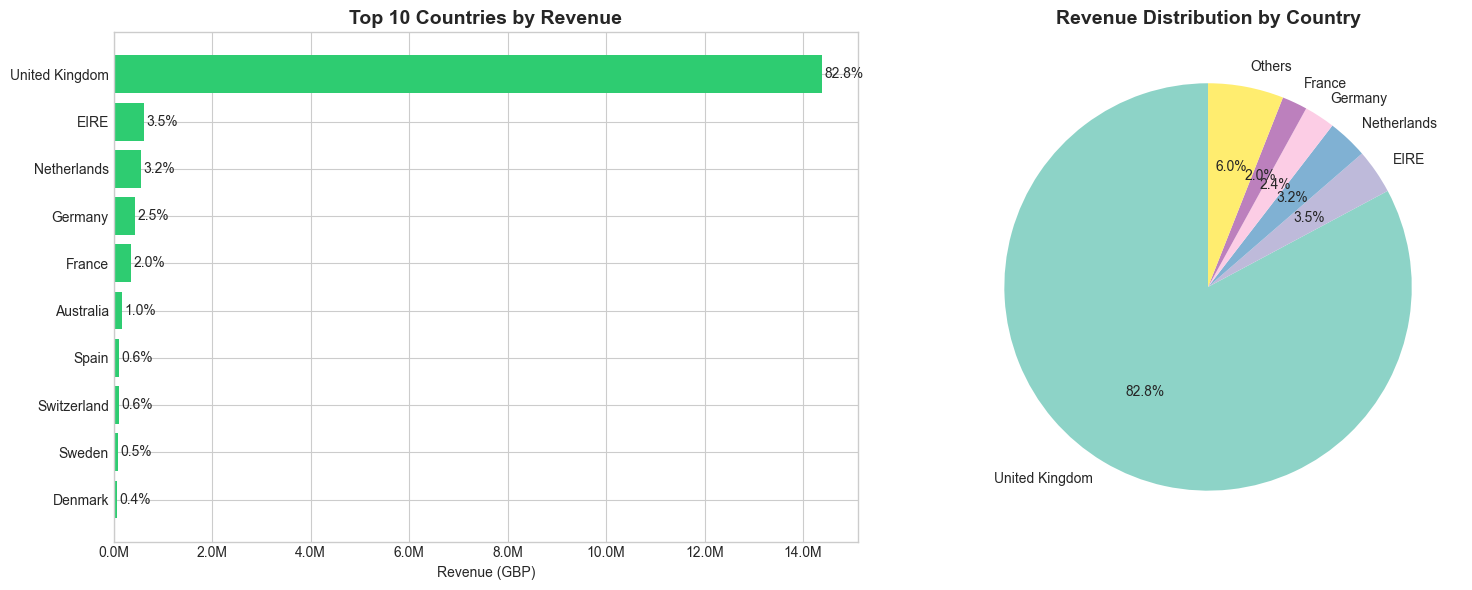


Plot saved: outputs/country_analysis.png

Top 10 Countries by Revenue:


,Country,Revenue,Transactions,Customers,Quantity,Revenue_Pct
38,United Kingdom,14389234.92,33541,5350,8532411,82.82
10,EIRE,616570.54,567,5,318021,3.55
24,Netherlands,554038.09,228,22,383879,3.19
14,Germany,425019.71,789,107,225154,2.45
13,France,348768.96,614,95,270288,2.01
0,Australia,169283.46,95,15,103759,0.97
32,Spain,108332.49,154,41,50307,0.62
34,Switzerland,100061.94,90,22,52227,0.58
33,Sweden,91515.82,104,19,88495,0.53
9,Denmark,68580.69,43,12,237471,0.39


In [9]:
# =============================================================================
# CELL 7: COUNTRY ANALYSIS
# =============================================================================

print("=" * 60)
print("COUNTRY ANALYSIS")
print("=" * 60)

# Aggregate by country
country_analysis = df.groupby('Country').agg({
    'Revenue': 'sum',
    'Invoice': 'nunique',
    'Customer ID': 'nunique',
    'Quantity': 'sum'
}).reset_index()

country_analysis.columns = ['Country', 'Revenue', 'Transactions', 'Customers', 'Quantity']
country_analysis = country_analysis.sort_values('Revenue', ascending=False)

# Calculate percentages
country_analysis['Revenue_Pct'] = (country_analysis['Revenue'] / country_analysis['Revenue'].sum() * 100).round(2)

# Top 10 countries
top_countries = country_analysis.head(10)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Top 10 Countries by Revenue
ax1 = axes[0]
bars = ax1.barh(top_countries['Country'][::-1], top_countries['Revenue'][::-1], color='#2ecc71')
ax1.set_xlabel('Revenue (GBP)')
ax1.set_title('Top 10 Countries by Revenue', fontsize=14, fontweight='bold')
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M'))

# Add value labels
for bar, val, pct in zip(bars, top_countries['Revenue'][::-1], top_countries['Revenue_Pct'][::-1]):
    ax1.text(bar.get_width() + 50000, bar.get_y() + bar.get_height()/2, 
             f'{pct:.1f}%', va='center', fontsize=10)

# Plot 2: Revenue Distribution (Pie Chart) - Top 5 + Others
ax2 = axes[1]
top5 = country_analysis.head(5).copy()
others_revenue = country_analysis.iloc[5:]['Revenue'].sum()
pie_data = pd.concat([top5[['Country', 'Revenue']], 
                      pd.DataFrame({'Country': ['Others'], 'Revenue': [others_revenue]})])

colors = plt.cm.Set3(np.linspace(0, 1, len(pie_data)))
wedges, texts, autotexts = ax2.pie(pie_data['Revenue'], labels=pie_data['Country'], 
                                    autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Revenue Distribution by Country', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/country_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved: outputs/country_analysis.png")

# Display top 10 countries
print("\nTop 10 Countries by Revenue:")
display(top_countries)

CUSTOMER ANALYSIS

CUSTOMER STATISTICS
-----------------------------------------
Total Customers:         5,878
Avg Revenue/Customer:    2,955.90 GBP
Median Revenue/Customer: 867.74 GBP
Avg Orders/Customer:     6.29
Avg Tenure (days):       273.0



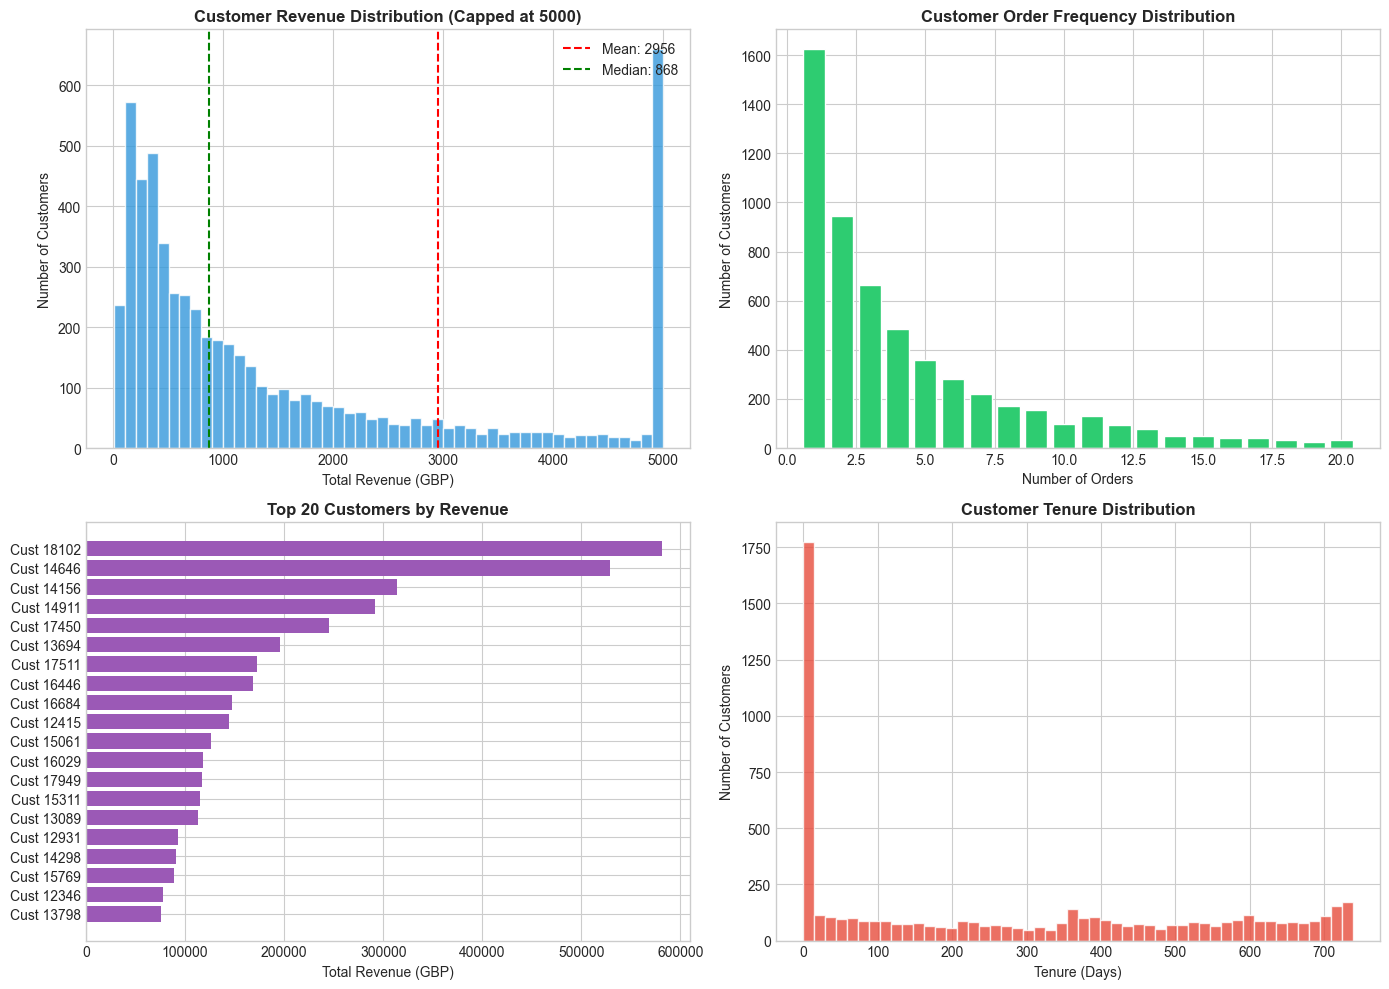


Plot saved: outputs/customer_analysis.png


In [10]:
# =============================================================================
# CELL 8: CUSTOMER ANALYSIS
# =============================================================================

print("=" * 60)
print("CUSTOMER ANALYSIS")
print("=" * 60)

# Customer-level aggregation
customer_analysis = df.groupby('Customer ID').agg({
    'Revenue': 'sum',
    'Invoice': 'nunique',
    'Quantity': 'sum',
    'InvoiceDate': ['min', 'max']
}).reset_index()

customer_analysis.columns = ['CustomerID', 'TotalRevenue', 'TotalOrders', 
                              'TotalQuantity', 'FirstPurchase', 'LastPurchase']

# Calculate customer tenure (days)
customer_analysis['Tenure'] = (customer_analysis['LastPurchase'] - 
                                customer_analysis['FirstPurchase']).dt.days

# Calculate average order value
customer_analysis['AvgOrderValue'] = customer_analysis['TotalRevenue'] / customer_analysis['TotalOrders']

# Customer statistics
print(f"""
CUSTOMER STATISTICS
-----------------------------------------
Total Customers:         {len(customer_analysis):,}
Avg Revenue/Customer:    {customer_analysis['TotalRevenue'].mean():,.2f} GBP
Median Revenue/Customer: {customer_analysis['TotalRevenue'].median():,.2f} GBP
Avg Orders/Customer:     {customer_analysis['TotalOrders'].mean():.2f}
Avg Tenure (days):       {customer_analysis['Tenure'].mean():.1f}
""")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Revenue Distribution
ax1 = axes[0, 0]
ax1.hist(customer_analysis['TotalRevenue'].clip(upper=5000), bins=50, 
         color='#3498db', edgecolor='white', alpha=0.8)
ax1.axvline(customer_analysis['TotalRevenue'].mean(), color='red', 
            linestyle='--', label=f'Mean: {customer_analysis["TotalRevenue"].mean():.0f}')
ax1.axvline(customer_analysis['TotalRevenue'].median(), color='green', 
            linestyle='--', label=f'Median: {customer_analysis["TotalRevenue"].median():.0f}')
ax1.set_xlabel('Total Revenue (GBP)')
ax1.set_ylabel('Number of Customers')
ax1.set_title('Customer Revenue Distribution (Capped at 5000)', fontsize=12, fontweight='bold')
ax1.legend()

# Plot 2: Orders Distribution
ax2 = axes[0, 1]
order_counts = customer_analysis['TotalOrders'].value_counts().sort_index().head(20)
ax2.bar(order_counts.index, order_counts.values, color='#2ecc71', edgecolor='white')
ax2.set_xlabel('Number of Orders')
ax2.set_ylabel('Number of Customers')
ax2.set_title('Customer Order Frequency Distribution', fontsize=12, fontweight='bold')

# Plot 3: Top 20 Customers by Revenue
ax3 = axes[1, 0]
top_customers = customer_analysis.nlargest(20, 'TotalRevenue')
ax3.barh(range(20), top_customers['TotalRevenue'].values, color='#9b59b6')
ax3.set_yticks(range(20))
ax3.set_yticklabels([f"Cust {int(x)}" for x in top_customers['CustomerID'].values])
ax3.set_xlabel('Total Revenue (GBP)')
ax3.set_title('Top 20 Customers by Revenue', fontsize=12, fontweight='bold')
ax3.invert_yaxis()

# Plot 4: Customer Tenure Distribution
ax4 = axes[1, 1]
ax4.hist(customer_analysis['Tenure'], bins=50, color='#e74c3c', edgecolor='white', alpha=0.8)
ax4.set_xlabel('Tenure (Days)')
ax4.set_ylabel('Number of Customers')
ax4.set_title('Customer Tenure Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/customer_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved: outputs/customer_analysis.png")

PRODUCT ANALYSIS


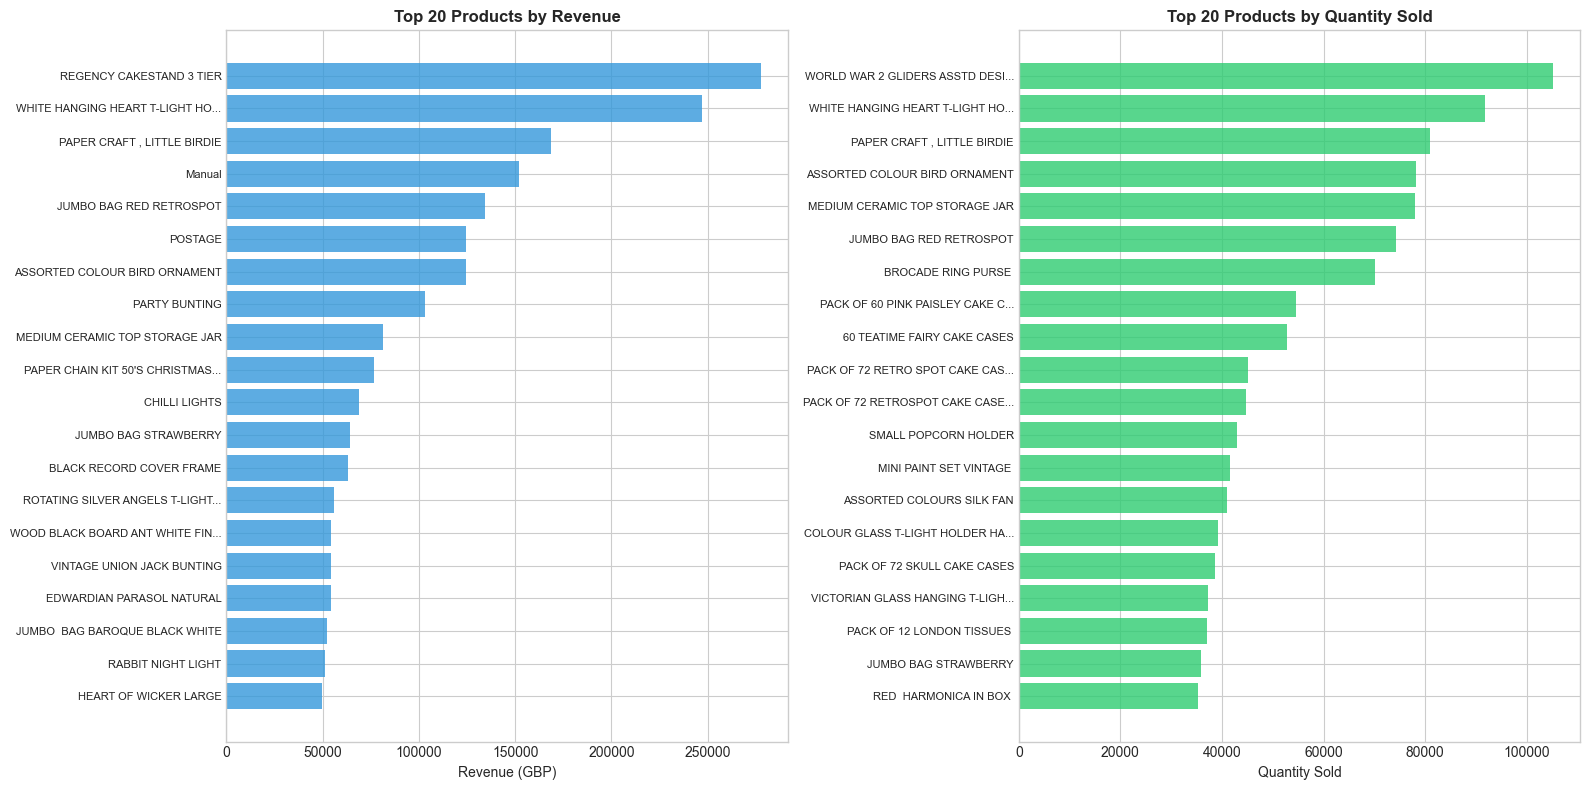


Plot saved: outputs/product_analysis.png

Top 20 Products by Revenue:


,StockCode,Description,Revenue,QuantitySold
1862,22423,REGENCY CAKESTAND 3 TIER,277656.25,24124
4751,85123A,WHITE HANGING HEART T-LIGHT HOLDER,247048.01,91757
3283,23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60,80995
5309,M,Manual,151777.67,9384
4725,85099B,JUMBO BAG RED RETROSPOT,134307.44,74224
5311,POST,POSTAGE,124648.04,5235
4456,84879,ASSORTED COLOUR BIRD ORNAMENT,124351.86,78234
3627,47566,PARTY BUNTING,103283.38,23460
2781,23166,MEDIUM CERAMIC TOP STORAGE JAR,81416.73,77916
1449,22086,PAPER CHAIN KIT 50'S CHRISTMAS,76598.18,28380


In [11]:
# =============================================================================
# CELL 9: PRODUCT ANALYSIS
# =============================================================================

print("=" * 60)
print("PRODUCT ANALYSIS")
print("=" * 60)

# Product-level aggregation
product_analysis = df.groupby(['StockCode', 'Description']).agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'Invoice': 'nunique',
    'Customer ID': 'nunique'
}).reset_index()

product_analysis.columns = ['StockCode', 'Description', 'Revenue', 
                             'QuantitySold', 'Transactions', 'UniqueCustomers']

product_analysis = product_analysis.sort_values('Revenue', ascending=False)

# Top 20 products by revenue
top_products = product_analysis.head(20)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Top 20 Products by Revenue
ax1 = axes[0]
y_pos = range(len(top_products))
ax1.barh(y_pos, top_products['Revenue'], color='#3498db', alpha=0.8)
ax1.set_yticks(y_pos)
ax1.set_yticklabels([desc[:30] + '...' if len(str(desc)) > 30 else desc 
                     for desc in top_products['Description']], fontsize=8)
ax1.set_xlabel('Revenue (GBP)')
ax1.set_title('Top 20 Products by Revenue', fontsize=12, fontweight='bold')
ax1.invert_yaxis()

# Plot 2: Top 20 Products by Quantity
top_by_qty = product_analysis.nlargest(20, 'QuantitySold')
ax2 = axes[1]
y_pos = range(len(top_by_qty))
ax2.barh(y_pos, top_by_qty['QuantitySold'], color='#2ecc71', alpha=0.8)
ax2.set_yticks(y_pos)
ax2.set_yticklabels([desc[:30] + '...' if len(str(desc)) > 30 else desc 
                     for desc in top_by_qty['Description']], fontsize=8)
ax2.set_xlabel('Quantity Sold')
ax2.set_title('Top 20 Products by Quantity Sold', fontsize=12, fontweight='bold')
ax2.invert_yaxis()

plt.tight_layout()
plt.savefig('../outputs/product_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved: outputs/product_analysis.png")

# Display top products
print("\nTop 20 Products by Revenue:")
display(top_products[['StockCode', 'Description', 'Revenue', 'QuantitySold']])

PRICE DISTRIBUTION ANALYSIS

PRICE STATISTICS
-----------------------------------------
Mean Price:              3.22 GBP
Median Price:            1.95 GBP
Min Price:               0.00 GBP
Max Price:               10953.50 GBP
Standard Deviation:      29.68 GBP



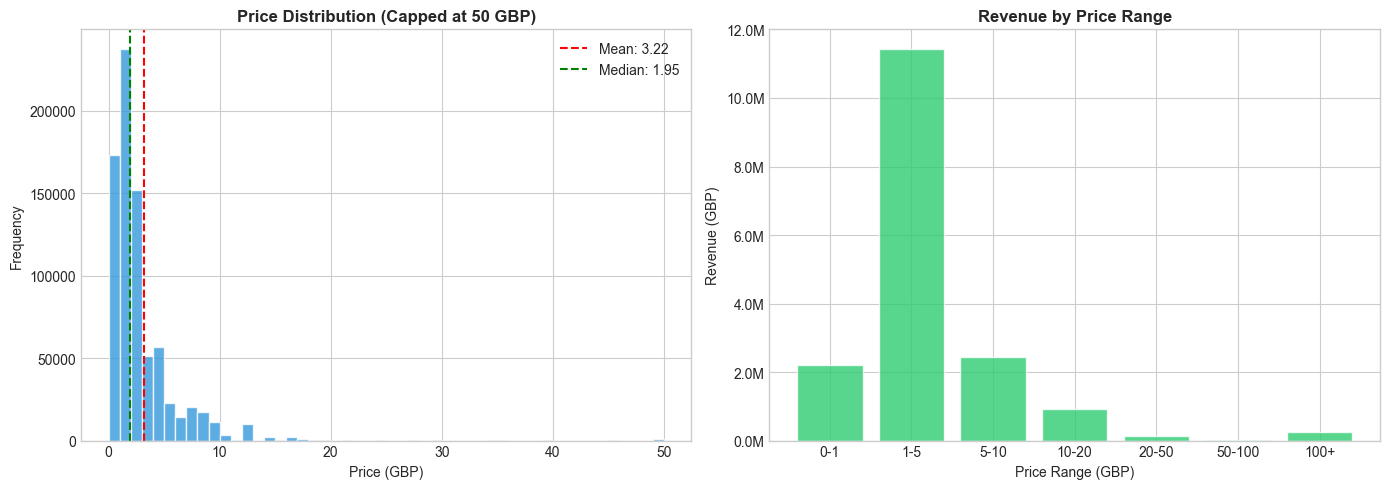


Plot saved: outputs/price_analysis.png

Price Range Distribution:


,PriceRange,Revenue,Quantity,Transactions
0,0-1,2193965.43,4537613,173025
1,1-5,11429013.80,5560502,498470
2,5-10,2425151.69,339353,85375
3,10-20,915241.29,71686,20350
4,20-50,135192.02,3999,1692
5,50-100,21774.63,316,156
6,100+,254465.41,483,357


In [12]:
# =============================================================================
# CELL 10: PRICE DISTRIBUTION ANALYSIS
# =============================================================================

print("=" * 60)
print("PRICE DISTRIBUTION ANALYSIS")
print("=" * 60)

# Price statistics
print(f"""
PRICE STATISTICS
-----------------------------------------
Mean Price:              {df['Price'].mean():.2f} GBP
Median Price:            {df['Price'].median():.2f} GBP
Min Price:               {df['Price'].min():.2f} GBP
Max Price:               {df['Price'].max():.2f} GBP
Standard Deviation:      {df['Price'].std():.2f} GBP
""")

# Price ranges
price_bins = [0, 1, 5, 10, 20, 50, 100, float('inf')]
price_labels = ['0-1', '1-5', '5-10', '10-20', '20-50', '50-100', '100+']
df['PriceRange'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels)

price_distribution = df.groupby('PriceRange').agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'Invoice': 'count'
}).reset_index()

price_distribution.columns = ['PriceRange', 'Revenue', 'Quantity', 'Transactions']

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Price Distribution (Histogram)
ax1 = axes[0]
ax1.hist(df['Price'].clip(upper=50), bins=50, color='#3498db', edgecolor='white', alpha=0.8)
ax1.set_xlabel('Price (GBP)')
ax1.set_ylabel('Frequency')
ax1.set_title('Price Distribution (Capped at 50 GBP)', fontsize=12, fontweight='bold')
ax1.axvline(df['Price'].mean(), color='red', linestyle='--', label=f'Mean: {df["Price"].mean():.2f}')
ax1.axvline(df['Price'].median(), color='green', linestyle='--', label=f'Median: {df["Price"].median():.2f}')
ax1.legend()

# Plot 2: Revenue by Price Range
ax2 = axes[1]
ax2.bar(price_distribution['PriceRange'].astype(str), price_distribution['Revenue'], 
        color='#2ecc71', edgecolor='white', alpha=0.8)
ax2.set_xlabel('Price Range (GBP)')
ax2.set_ylabel('Revenue (GBP)')
ax2.set_title('Revenue by Price Range', fontsize=12, fontweight='bold')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M'))

plt.tight_layout()
plt.savefig('../outputs/price_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved: outputs/price_analysis.png")
print("\nPrice Range Distribution:")
display(price_distribution)

BASKET ANALYSIS

BASKET STATISTICS
-----------------------------------------
Total Baskets:           36,969
Avg Basket Value:        469.98 GBP
Median Basket Value:     303.04 GBP
Avg Items per Basket:    284.4
Avg Unique Products:     20.8



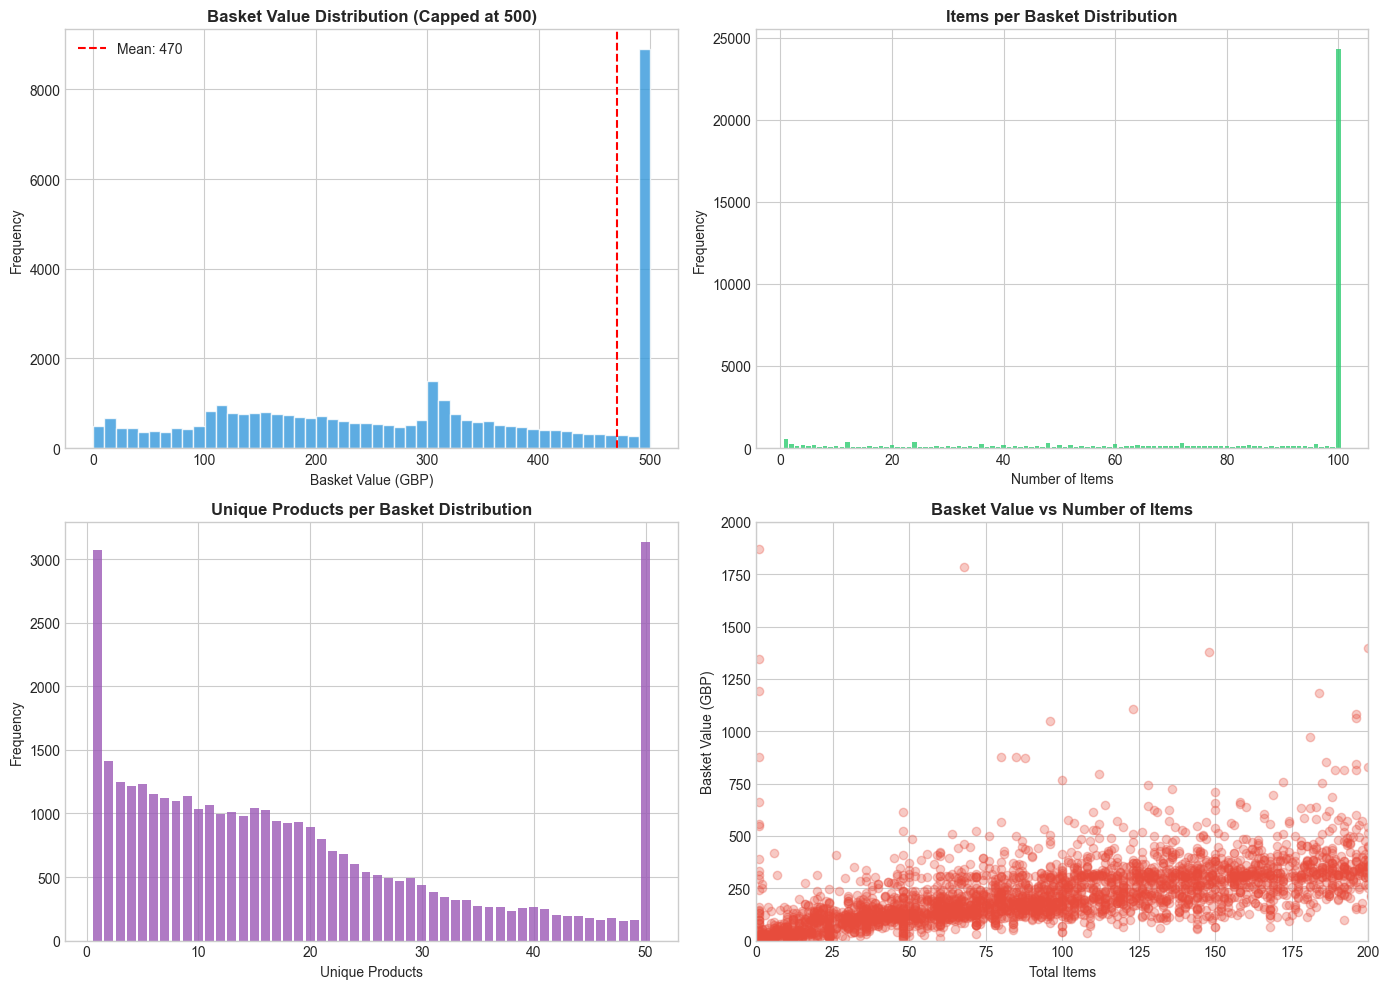


Plot saved: outputs/basket_analysis.png


In [13]:
# =============================================================================
# CELL 11: BASKET ANALYSIS
# =============================================================================

print("=" * 60)
print("BASKET ANALYSIS")
print("=" * 60)

# Basket-level aggregation
basket_analysis = df.groupby('Invoice').agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'StockCode': 'nunique',
    'Customer ID': 'first'
}).reset_index()

basket_analysis.columns = ['Invoice', 'BasketValue', 'TotalItems', 'UniqueProducts', 'CustomerID']

# Basket statistics
print(f"""
BASKET STATISTICS
-----------------------------------------
Total Baskets:           {len(basket_analysis):,}
Avg Basket Value:        {basket_analysis['BasketValue'].mean():.2f} GBP
Median Basket Value:     {basket_analysis['BasketValue'].median():.2f} GBP
Avg Items per Basket:    {basket_analysis['TotalItems'].mean():.1f}
Avg Unique Products:     {basket_analysis['UniqueProducts'].mean():.1f}
""")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Basket Value Distribution
ax1 = axes[0, 0]
ax1.hist(basket_analysis['BasketValue'].clip(upper=500), bins=50, 
         color='#3498db', edgecolor='white', alpha=0.8)
ax1.set_xlabel('Basket Value (GBP)')
ax1.set_ylabel('Frequency')
ax1.set_title('Basket Value Distribution (Capped at 500)', fontsize=12, fontweight='bold')
ax1.axvline(basket_analysis['BasketValue'].mean(), color='red', linestyle='--', 
            label=f'Mean: {basket_analysis["BasketValue"].mean():.0f}')
ax1.legend()

# Plot 2: Items per Basket Distribution
ax2 = axes[0, 1]
items_dist = basket_analysis['TotalItems'].clip(upper=100).value_counts().sort_index()
ax2.bar(items_dist.index, items_dist.values, color='#2ecc71', alpha=0.8)
ax2.set_xlabel('Number of Items')
ax2.set_ylabel('Frequency')
ax2.set_title('Items per Basket Distribution', fontsize=12, fontweight='bold')

# Plot 3: Unique Products per Basket
ax3 = axes[1, 0]
unique_dist = basket_analysis['UniqueProducts'].clip(upper=50).value_counts().sort_index()
ax3.bar(unique_dist.index, unique_dist.values, color='#9b59b6', alpha=0.8)
ax3.set_xlabel('Unique Products')
ax3.set_ylabel('Frequency')
ax3.set_title('Unique Products per Basket Distribution', fontsize=12, fontweight='bold')

# Plot 4: Basket Value vs Items Scatter
ax4 = axes[1, 1]
sample = basket_analysis.sample(min(5000, len(basket_analysis)))
ax4.scatter(sample['TotalItems'], sample['BasketValue'], alpha=0.3, color='#e74c3c')
ax4.set_xlabel('Total Items')
ax4.set_ylabel('Basket Value (GBP)')
ax4.set_title('Basket Value vs Number of Items', fontsize=12, fontweight='bold')
ax4.set_xlim(0, 200)
ax4.set_ylim(0, 2000)

plt.tight_layout()
plt.savefig('../outputs/basket_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved: outputs/basket_analysis.png")

CORRELATION ANALYSIS


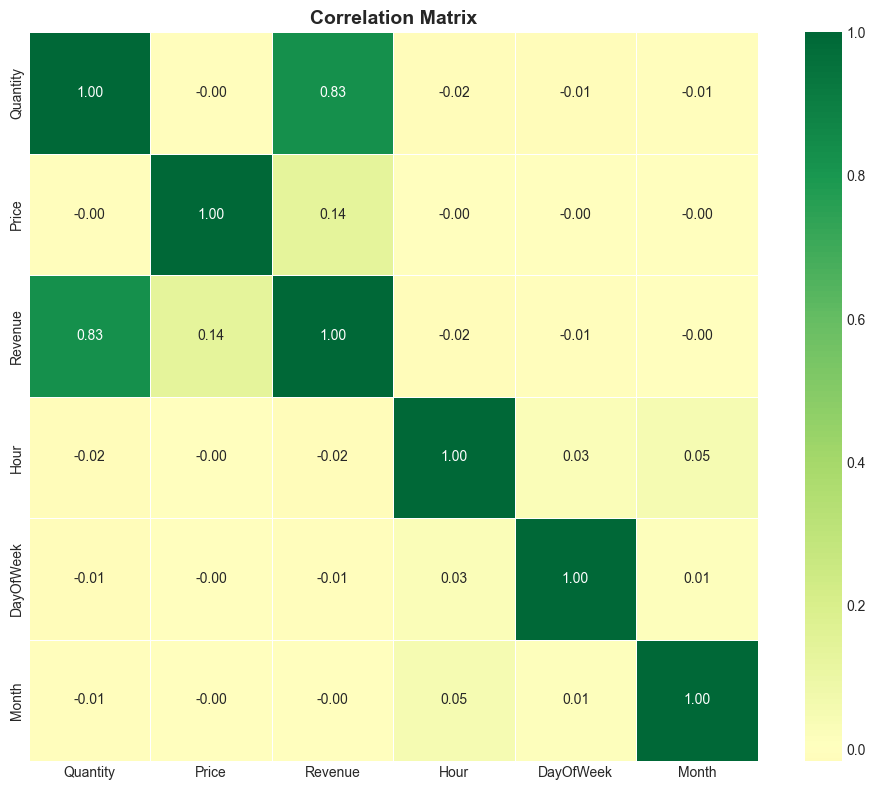


Plot saved: outputs/correlation_matrix.png

Correlation Matrix:


,Quantity,Price,Revenue,Hour,DayOfWeek,Month
Quantity,1.00,-0.00,0.83,-0.02,-0.01,-0.01
Price,-0.00,1.00,0.14,-0.00,-0.00,-0.00
Revenue,0.83,0.14,1.00,-0.02,-0.01,-0.00
Hour,-0.02,-0.00,-0.02,1.00,0.03,0.05
DayOfWeek,-0.01,-0.00,-0.01,0.03,1.00,0.01
Month,-0.01,-0.00,-0.00,0.05,0.01,1.00


In [14]:
# =============================================================================
# CELL 12: CORRELATION ANALYSIS
# =============================================================================

print("=" * 60)
print("CORRELATION ANALYSIS")
print("=" * 60)

# Select numeric columns for correlation
numeric_cols = ['Quantity', 'Price', 'Revenue', 'Hour', 'DayOfWeek', 'Month']
correlation_matrix = df[numeric_cols].corr()

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0, 
            fmt='.2f', square=True, linewidths=0.5, ax=ax)
ax.set_title('Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved: outputs/correlation_matrix.png")
print("\nCorrelation Matrix:")
display(correlation_matrix)

SEASONALITY ANALYSIS


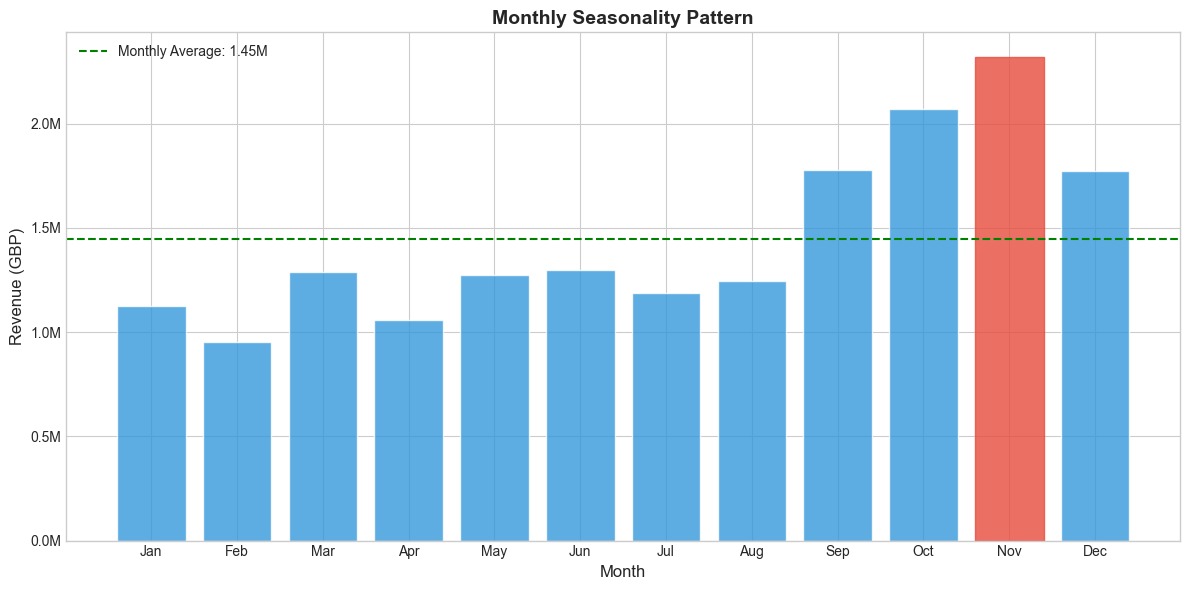


Plot saved: outputs/seasonality_analysis.png

Peak Month: 11 with Revenue: 2,322,665.63 GBP


In [15]:
# =============================================================================
# CELL 13: SEASONALITY ANALYSIS
# =============================================================================

print("=" * 60)
print("SEASONALITY ANALYSIS")
print("=" * 60)

# Monthly patterns
monthly_pattern = df.groupby('Month')['Revenue'].sum().reset_index()

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(monthly_pattern['Month'], monthly_pattern['Revenue'], 
              color='#3498db', edgecolor='white', alpha=0.8)

# Highlight peak months
max_revenue = monthly_pattern['Revenue'].max()
for i, bar in enumerate(bars):
    if monthly_pattern.iloc[i]['Revenue'] == max_revenue:
        bar.set_color('#e74c3c')

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Revenue (GBP)', fontsize=12)
ax.set_title('Monthly Seasonality Pattern', fontsize=14, fontweight='bold')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M'))

# Add average line
avg_monthly = monthly_pattern['Revenue'].mean()
ax.axhline(y=avg_monthly, color='green', linestyle='--', 
           label=f'Monthly Average: {avg_monthly/1000000:.2f}M')
ax.legend()

plt.tight_layout()
plt.savefig('../outputs/seasonality_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved: outputs/seasonality_analysis.png")

# Find peak month
peak_month = monthly_pattern.loc[monthly_pattern['Revenue'].idxmax()]
print(f"\nPeak Month: {int(peak_month['Month'])} with Revenue: {peak_month['Revenue']:,.2f} GBP")

In [16]:
# =============================================================================
# CELL 14: SAVE EDA OUTPUTS FOR POWER BI
# =============================================================================

print("=" * 60)
print("SAVING EDA OUTPUTS")
print("=" * 60)

# 1. Monthly Summary
monthly_summary = df.groupby(df['InvoiceDate'].dt.to_period('M')).agg({
    'Revenue': 'sum',
    'Invoice': 'nunique',
    'Customer ID': 'nunique',
    'Quantity': 'sum',
    'StockCode': 'nunique'
}).reset_index()
monthly_summary.columns = ['Month', 'Revenue', 'Transactions', 'Customers', 'Quantity', 'Products']
monthly_summary['Month'] = monthly_summary['Month'].astype(str)
monthly_summary.to_csv('../outputs/powerbi/monthly_summary.csv', index=False)
print("Saved: outputs/powerbi/monthly_summary.csv")

# 2. Country Summary
country_summary = country_analysis.copy()
country_summary.to_csv('../outputs/powerbi/country_summary.csv', index=False)
print("Saved: outputs/powerbi/country_summary.csv")

# 3. Customer Summary
customer_summary = customer_analysis.copy()
customer_summary.to_csv('../outputs/powerbi/customer_summary.csv', index=False)
print("Saved: outputs/powerbi/customer_summary.csv")

# 4. Product Summary
product_summary = product_analysis.head(100).copy()
product_summary.to_csv('../outputs/powerbi/product_summary.csv', index=False)
print("Saved: outputs/powerbi/product_summary.csv")

# 5. Daily Summary
daily_summary = df.groupby(df['InvoiceDate'].dt.date).agg({
    'Revenue': 'sum',
    'Invoice': 'nunique',
    'Customer ID': 'nunique',
    'Quantity': 'sum'
}).reset_index()
daily_summary.columns = ['Date', 'Revenue', 'Transactions', 'Customers', 'Quantity']
daily_summary.to_csv('../outputs/powerbi/daily_summary.csv', index=False)
print("Saved: outputs/powerbi/daily_summary.csv")

print("\nAll Power BI datasets saved successfully")

SAVING EDA OUTPUTS
Saved: outputs/powerbi/monthly_summary.csv
Saved: outputs/powerbi/country_summary.csv
Saved: outputs/powerbi/customer_summary.csv
Saved: outputs/powerbi/product_summary.csv
Saved: outputs/powerbi/daily_summary.csv

All Power BI datasets saved successfully


In [17]:
# =============================================================================
# CELL 15: EDA SUMMARY REPORT
# =============================================================================

print("=" * 70)
print("NOTEBOOK 02 - EDA SUMMARY REPORT")
print("=" * 70)

report = f"""
-----------------------------------------------------------------------------
                     EXPLORATORY DATA ANALYSIS SUMMARY
-----------------------------------------------------------------------------

DATASET OVERVIEW
-----------------------------------------
Total Records:           {len(df):,}
Date Range:              {df['InvoiceDate'].min().date()} to {df['InvoiceDate'].max().date()}
Total Revenue:           {total_revenue:,.2f} GBP

CUSTOMER INSIGHTS
-----------------------------------------
Total Customers:         {total_customers:,}
Avg Revenue/Customer:    {avg_revenue_per_customer:,.2f} GBP
Top Country:             {country_analysis.iloc[0]['Country']} ({country_analysis.iloc[0]['Revenue_Pct']:.1f}% of revenue)

ORDER INSIGHTS
-----------------------------------------
Total Transactions:      {total_transactions:,}
Avg Order Value:         {avg_order_value:,.2f} GBP
Avg Items per Order:     {avg_items_per_order:.1f}

PRODUCT INSIGHTS
-----------------------------------------
Total Products:          {total_products:,}
Top Product:             {product_analysis.iloc[0]['Description'][:40]}
Top Product Revenue:     {product_analysis.iloc[0]['Revenue']:,.2f} GBP

TIME PATTERNS
-----------------------------------------
Peak Hour:               {peak_hour}:00
Peak Month:              {int(peak_month['Month'])}
Best Day:                {dow_analysis.loc[dow_analysis['Revenue'].idxmax(), 'DayName']}

FILES GENERATED
-----------------------------------------
Visualizations:
  - revenue_trends.png
  - day_of_week_analysis.png
  - hourly_analysis.png
  - country_analysis.png
  - customer_analysis.png
  - product_analysis.png
  - price_analysis.png
  - basket_analysis.png
  - correlation_matrix.png
  - seasonality_analysis.png

Power BI Datasets:
  - monthly_summary.csv
  - country_summary.csv
  - customer_summary.csv
  - product_summary.csv
  - daily_summary.csv

-----------------------------------------------------------------------------
READY FOR NOTEBOOK 03: SALES FORECASTING
-----------------------------------------------------------------------------
"""

print(report)

NOTEBOOK 02 - EDA SUMMARY REPORT

-----------------------------------------------------------------------------
                     EXPLORATORY DATA ANALYSIS SUMMARY
-----------------------------------------------------------------------------

DATASET OVERVIEW
-----------------------------------------
Total Records:           779,425
Date Range:              2009-12-01 to 2011-12-09
Total Revenue:           17,374,804.27 GBP

CUSTOMER INSIGHTS
-----------------------------------------
Total Customers:         5,878
Avg Revenue/Customer:    2,955.90 GBP
Top Country:             United Kingdom (82.8% of revenue)

ORDER INSIGHTS
-----------------------------------------
Total Transactions:      36,969
Avg Order Value:         469.98 GBP
Avg Items per Order:     284.4

PRODUCT INSIGHTS
-----------------------------------------
Total Products:          4,631
Top Product:             REGENCY CAKESTAND 3 TIER
Top Product Revenue:     277,656.25 GBP

TIME PATTERNS
---------------------------